# Video pipeline with Yolo + Resnet Model
### Note 1, For now with dummy throughputs

In [164]:
import os
import pandas as pd
import sys
import yaml
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)


# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..')))

from experiments.utils.constants import (
    PIPELINE_SIMULATION_CONFIGS_PATH,
    PIPELINE_SIMULATION_RESULTS_PATH
)

series = 106
series_path = os.path.join(
    PIPELINE_SIMULATION_RESULTS_PATH, 'series', str(series))

In [165]:
# load constraints
config_path = os.path.join(
    series_path, f"{0}.yaml")
with open(config_path, 'r') as cf:
    config = yaml.safe_load(cf)
all_states = pd.read_csv(
    os.path.join(series_path, 'all-states.csv'))
with_constraints = pd.read_csv(
    os.path.join(series_path, 'with-constraints.csv'))
# optimal_brute_froce = pd.read_csv(
#     os.path.join(series_path, 'optimal-brute-force.csv'))
# optimal_gurobi = pd.read_csv(
#     os.path.join(series_path, 'optimal-gurobi.csv'))
all_states.columns

Index(['task_0_latency', 'task_0_throughput', 'task_0_throughput_all_replicas',
       'task_0_accuracy', 'task_0_measured', 'task_0_cpu_all_replicas',
       'task_0_gpu_all_replicas', 'task_1_latency', 'task_1_throughput',
       'task_1_throughput_all_replicas', 'task_1_accuracy', 'task_1_measured',
       'task_1_cpu_all_replicas', 'task_1_gpu_all_replicas',
       'pipeline_accuracy', 'pipeline_latency', 'pipeline_throughput',
       'pipeline_cpu', 'pipeline_gpu', 'alpha', 'beta', 'gamma',
       'accuracy_objective', 'resource_objective', 'batch_objective',
       'task_0_variant', 'task_0_cpu', 'task_0_gpu', 'task_0_batch',
       'task_0_replicas', 'task_1_variant', 'task_1_cpu', 'task_1_gpu',
       'task_1_batch', 'task_1_replicas', 'objective'],
      dtype='object')

In [166]:
config

{'series': 106,
 'pipeline_name': 'video',
 'series_meta': 'checking the effect of changing all variables under arrival rate 1,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
 'number_tasks': 2,
 'profiling_series': [71, 72],
 'model_name': ['yolo', 'resnet-human'],
 'task_name': ['crop', 'classification'],
 'experiment_id': [1, 1],
 'initial_active_model': ['yolov5n', 'resnet18'],
 'initial_cpu_allocation': [1, 1],
 'initial_replica': [1, 1],
 'initial_batch': [1, 1],
 'alpha': 1,
 'beta': 1,
 'gamma': 1,
 'scaling_cap': 10,
 'arrival_rate': 2,
 'num_state_limit': 100000000000,
 'threshold': 4,
 'optimization_method': 'brute-force',
 'allocation_mode': 'variable',
 'sla_factor': 5,
 'normalize_accuracy': True,
 'complete_profile': True,
 'only_measured_profiles': True,
 'profiling_load': 20,
 'accuracy_method': 'sum',
 'generate': ['all', 'feasible', 'optimal']}

In [167]:
# HACK
sla = 0.4956369389744915
sla_factor = config['sla_factor']
arrival_rate = config['arrival_rate']
threshold = config['threshold']
sla_partial = sla / sla_factor

sla_factor_1 = 6
new_sla = sla_partial * sla_factor_1

print(f"{threshold = }")
print(f"{sla_factor = }")
print(f"{sla = }")
print(f"{sla_partial = }")
print(f"{arrival_rate = }")
print(f"{new_sla = }")

threshold = 4
sla_factor = 5
sla = 0.4956369389744915
sla_partial = 0.0991273877948983
arrival_rate = 2
new_sla = 0.5947643267693898


In [194]:
selected_stats =[
    'task_0_variant', 'task_0_cpu', 'task_0_batch',
    'task_0_replicas',
    'task_0_latency', 'task_0_throughput', 'task_0_accuracy',
    'task_1_variant', 'task_1_cpu', 'task_1_batch',
    'task_1_replicas',
    'task_1_latency', 'task_1_throughput', 'task_1_accuracy',
    'pipeline_throughput',
    # 'pipeline_accuracy', 'pipeline_latency', 
    # 'pipeline_cpu',
    'accuracy_objective', 'resource_objective', 'batch_objective', 'objective']

In [195]:
all_states[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
0,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet34,8,1,1,0.058618,20.004727,0.25,12.421053,0.75,16,2,-17.25
1,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.75,9,2,-10.25
2,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet34,2,1,1,0.167521,17.696970,0.25,12.421053,0.75,10,2,-11.25
3,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet34,4,1,1,0.086035,19.882333,0.25,12.421053,0.75,12,2,-13.25
4,yolov5m,1,1,1,0.539440,3.370005,0.5,resnet34,8,1,1,0.058618,20.004727,0.25,3.370005,0.75,9,2,-10.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959995,yolov5n,2,64,10,1.807878,16.723709,0.0,resnet101,4,64,10,1.306368,17.447761,0.75,167.237085,0.75,60,128,-187.25
959996,yolov5n,4,64,10,0.697491,20.016949,0.0,resnet101,8,64,10,0.676325,19.540833,0.75,195.408328,0.75,120,128,-247.25
959997,yolov5n,4,64,10,0.697491,20.016949,0.0,resnet101,1,64,10,2.459691,5.529771,0.75,55.297709,0.75,50,128,-177.25
959998,yolov5n,4,64,10,0.697491,20.016949,0.0,resnet101,2,64,10,2.735276,8.776218,0.75,87.762180,0.75,60,128,-187.25


In [170]:
all_states['task_0_throughput']

0         12.421053
1         12.421053
2         12.421053
3         12.421053
4          3.370005
            ...    
959995    16.723709
959996    20.016949
959997    20.016949
959998    20.016949
959999    20.016949
Name: task_0_throughput, Length: 960000, dtype: float64

In [171]:
set(all_states['task_0_variant'])

{'yolov5l', 'yolov5m', 'yolov5n', 'yolov5s', 'yolov5x'}

In [172]:
set(all_states['task_1_variant'])

{'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50'}

In [173]:
batch = 1
model = 'resnet34'
single_batch = all_states[(all_states['task_1_batch'] == batch) & (all_states['task_1_variant'] == model)][['task_1_cpu', 'task_1_throughput']].drop_duplicates().sort_values(by='task_1_cpu')
single_batch

,task_1_cpu,task_1_throughput
1,1,9.760331
2,2,17.696970
3,4,19.882333
0,8,20.004727


In [174]:
batch = 1
model = 'yolov5s'
single_batch = all_states[(all_states['task_0_batch'] == batch) & (all_states['task_0_variant'] == model)][['task_0_cpu', 'task_0_throughput']].drop_duplicates().sort_values(by='task_0_cpu')
single_batch

,task_0_cpu,task_0_throughput
192004,1,6.574586
192008,2,8.713235
192012,4,13.744186
192000,8,18.375000


In [175]:
all_states[(all_states['task_0_batch'] == batch) & (all_states['task_0_cpu'] == cpu) & (all_states['task_1_batch'] == batch) & (all_states['task_1_cpu'] == cpu)]

,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
5,0.53944,3.370005,3.370005,0.5,True,1,0,0.140669,9.760331,9.760331,...,1,0,1,1,resnet34,1,0,1,1,-3.25
405,0.53944,3.370005,3.370005,0.5,True,1,0,0.140669,9.760331,19.520661,...,1,0,1,1,resnet34,1,0,1,2,-4.25
805,0.53944,3.370005,3.370005,0.5,True,1,0,0.140669,9.760331,29.280992,...,1,0,1,1,resnet34,1,0,1,3,-5.25
1205,0.53944,3.370005,3.370005,0.5,True,1,0,0.140669,9.760331,39.041322,...,1,0,1,1,resnet34,1,0,1,4,-6.25
1605,0.53944,3.370005,3.370005,0.5,True,1,0,0.140669,9.760331,48.801653,...,1,0,1,1,resnet34,1,0,1,5,-7.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958005,0.19799,15.076923,150.769231,0.0,True,10,0,0.376474,5.668565,34.011392,...,1,0,1,10,resnet101,1,0,1,6,-17.25
958405,0.19799,15.076923,150.769231,0.0,True,10,0,0.376474,5.668565,39.679957,...,1,0,1,10,resnet101,1,0,1,7,-18.25
958805,0.19799,15.076923,150.769231,0.0,True,10,0,0.376474,5.668565,45.348522,...,1,0,1,10,resnet101,1,0,1,8,-19.25
959205,0.19799,15.076923,150.769231,0.0,True,10,0,0.376474,5.668565,51.017088,...,1,0,1,10,resnet101,1,0,1,9,-20.25


In [188]:
batch = 1
cpu = 1
replicas_cap = 1
single_batch = all_states[(all_states['task_0_batch'] == batch) & (all_states['task_0_cpu'] >= cpu) & (all_states['task_1_batch'] == batch) & (all_states['task_1_cpu'] == cpu)\
                           & (all_states['task_0_replicas'] <= replicas_cap) & (all_states['task_1_replicas'] <= replicas_cap)]
single_batch

,task_0_latency,task_0_throughput,task_0_throughput_all_replicas,task_0_accuracy,task_0_measured,task_0_cpu_all_replicas,task_0_gpu_all_replicas,task_1_latency,task_1_throughput,task_1_throughput_all_replicas,...,task_0_cpu,task_0_gpu,task_0_batch,task_0_replicas,task_1_variant,task_1_cpu,task_1_gpu,task_1_batch,task_1_replicas,objective
1,0.204542,12.421053,12.421053,0.5,True,8,0,0.140669,9.760331,9.760331,...,8,0,1,1,resnet34,1,0,1,1,-10.25
5,0.539440,3.370005,3.370005,0.5,True,1,0,0.140669,9.760331,9.760331,...,1,0,1,1,resnet34,1,0,1,1,-3.25
9,0.329959,4.973096,4.973096,0.5,True,2,0,0.140669,9.760331,9.760331,...,2,0,1,1,resnet34,1,0,1,1,-4.25
13,0.407426,8.546763,8.546763,0.5,True,4,0,0.140669,9.760331,9.760331,...,4,0,1,1,resnet34,1,0,1,1,-6.25
40001,0.204542,12.421053,12.421053,0.5,True,8,0,0.298555,9.396825,9.396825,...,8,0,1,1,resnet50,1,0,1,1,-10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880013,0.134280,20.000000,20.000000,0.0,True,4,0,0.116586,17.651515,17.651515,...,4,0,1,1,resnet18,1,0,1,1,-7.00
920001,0.083358,20.016949,20.016949,0.0,True,8,0,0.376474,5.668565,5.668565,...,8,0,1,1,resnet101,1,0,1,1,-10.25
920005,0.197990,15.076923,15.076923,0.0,True,1,0,0.376474,5.668565,5.668565,...,1,0,1,1,resnet101,1,0,1,1,-3.25
920009,0.093119,17.991585,17.991585,0.0,True,2,0,0.376474,5.668565,5.668565,...,2,0,1,1,resnet101,1,0,1,1,-4.25


In [189]:
single_batch[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,...,task_1_throughput,task_1_accuracy,pipeline_accuracy,pipeline_latency,pipeline_throughput,pipeline_cpu,accuracy_objective,resource_objective,batch_objective,objective
1,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet34,1,1,...,9.760331,0.25,0.75,0.345211,9.760331,9,0.75,9,2,-10.25
5,yolov5m,1,1,1,0.539440,3.370005,0.5,resnet34,1,1,...,9.760331,0.25,0.75,0.680109,3.370005,2,0.75,2,2,-3.25
9,yolov5m,2,1,1,0.329959,4.973096,0.5,resnet34,1,1,...,9.760331,0.25,0.75,0.470628,4.973096,3,0.75,3,2,-4.25
13,yolov5m,4,1,1,0.407426,8.546763,0.5,resnet34,1,1,...,9.760331,0.25,0.75,0.548095,8.546763,5,0.75,5,2,-6.25
40001,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet50,1,1,...,9.396825,0.50,1.00,0.503097,9.396825,9,1.00,9,2,-10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880013,yolov5n,4,1,1,0.134280,20.000000,0.0,resnet18,1,1,...,17.651515,0.00,0.00,0.250866,17.651515,5,0.00,5,2,-7.00
920001,yolov5n,8,1,1,0.083358,20.016949,0.0,resnet101,1,1,...,5.668565,0.75,0.75,0.459832,5.668565,9,0.75,9,2,-10.25
920005,yolov5n,1,1,1,0.197990,15.076923,0.0,resnet101,1,1,...,5.668565,0.75,0.75,0.574464,5.668565,2,0.75,2,2,-3.25
920009,yolov5n,2,1,1,0.093119,17.991585,0.0,resnet101,1,1,...,5.668565,0.75,0.75,0.469593,5.668565,3,0.75,3,2,-4.25


In [177]:
# single_batch['task_0_accuracy'] = single_batch['task_0_accuracy'] / single_batch['task_0_accuracy'].max()
# single_batch['task_0_cpu'] = single_batch['task_0_cpu'] / single_batch['task_0_cpu'].max()

# single_batch['task_1_accuracy'] = single_batch['task_1_accuracy'] / single_batch['task_1_accuracy'].max()
# single_batch['task_1_cpu'] = single_batch['task_1_cpu'] / single_batch['task_1_cpu'].max()

# single_batch['accuracy_objective'] = single_batch['task_0_accuracy'] + single_batch['task_0_cpu'] * single_batch['task_0_replicas']
# single_batch['resource_objective'] = single_batch['task_1_accuracy'] + single_batch['task_1_cpu'] * single_batch['task_1_replicas']
# single_batch[['accuracy_objective', 'resource_objective']]
# single_batch['objective'] = single_batch['accuracy_objective'] - single_batch['resource_objective']
# single_batch['objective']

In [196]:

single_batch['objective'] = single_batch['accuracy_objective'] - single_batch['resource_objective']
mini = single_batch.pipeline_throughput.min()
single_batch[single_batch['pipeline_throughput'] == mini][selected_stats]

/tmp/ipykernel_1281838/638215502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_batch['objective'] = single_batch['accuracy_objective'] - single_batch['resource_objective']


,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
384005,yolov5x,1,1,1,2.783516,0.871732,1.0,resnet34,1,1,1,0.140669,9.760331,0.25,0.871732,1.25,2,2,-0.75
424005,yolov5x,1,1,1,2.783516,0.871732,1.0,resnet50,1,1,1,0.298555,9.396825,0.50,0.871732,1.50,2,2,-0.50
464005,yolov5x,1,1,1,2.783516,0.871732,1.0,resnet152,1,1,1,0.375856,3.574039,1.00,0.871732,2.00,2,2,0.00
496005,yolov5x,1,1,1,2.783516,0.871732,1.0,resnet18,1,1,1,0.116586,17.651515,0.00,0.871732,1.00,2,2,-1.00
536005,yolov5x,1,1,1,2.783516,0.871732,1.0,resnet101,1,1,1,0.376474,5.668565,0.75,0.871732,1.75,2,2,-0.25


## User One
low latency, low throughput


load = 6
new_sla = 0.49563693897449146


,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
1,yolov5m,8,1,1,0.204542,12.421053,0.50,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.75,9,2,-8.25
112001,yolov5m,8,1,1,0.204542,12.421053,0.50,resnet18,1,1,1,0.116586,17.651515,0.00,12.421053,0.50,9,2,-8.50
192001,yolov5s,8,1,1,0.132745,18.375000,0.25,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.50,9,2,-8.50
192005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet34,1,1,1,0.140669,9.760331,0.25,6.574586,0.50,2,2,-1.50
192009,yolov5s,2,1,1,0.224776,8.713235,0.25,resnet34,1,1,1,0.140669,9.760331,0.25,8.713235,0.50,3,2,-2.50
192013,yolov5s,4,1,1,0.141990,13.744186,0.25,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.50,5,2,-4.50
232001,yolov5s,8,1,1,0.132745,18.375000,0.25,resnet50,1,1,1,0.298555,9.396825,0.50,9.396825,0.75,9,2,-8.25
232013,yolov5s,4,1,1,0.141990,13.744186,0.25,resnet50,1,1,1,0.298555,9.396825,0.50,9.396825,0.75,5,2,-4.25
304001,yolov5s,8,1,1,0.132745,18.375000,0.25,resnet18,1,1,1,0.116586,17.651515,0.00,17.651515,0.25,9,2,-8.75
304005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet18,1,1,1,0.116586,17.651515,0.00,6.574586,0.25,2,2,-1.75


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='resource_objective'>

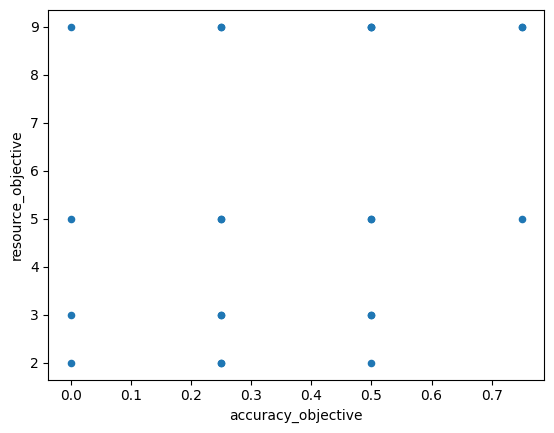

In [246]:
sla_factor_1 = 5

load = 6
new_sla = sla_partial * sla_factor_1

case_1 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
display(case_1[selected_stats])
case_1.plot.scatter(x='accuracy_objective', y='resource_objective')

In [247]:
max_value = case_1['accuracy_objective'].max()
max_rows = case_1[case_1['accuracy_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
1,yolov5m,8,1,1,0.204542,12.421053,0.50,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.75,9,2,-8.25
232001,yolov5s,8,1,1,0.132745,18.375000,0.25,resnet50,1,1,1,0.298555,9.396825,0.50,9.396825,0.75,9,2,-8.25
232013,yolov5s,4,1,1,0.141990,13.744186,0.25,resnet50,1,1,1,0.298555,9.396825,0.50,9.396825,0.75,5,2,-4.25


In [248]:
max_value = case_1['resource_objective'].min()
max_rows = case_1[case_1['resource_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
192005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet34,1,1,1,0.140669,9.760331,0.25,6.574586,0.50,2,2,-1.50
304005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet18,1,1,1,0.116586,17.651515,0.00,6.574586,0.25,2,2,-1.75
768005,yolov5n,1,1,1,0.197990,15.076923,0.00,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.25,2,2,-1.75
880005,yolov5n,1,1,1,0.197990,15.076923,0.00,resnet18,1,1,1,0.116586,17.651515,0.00,15.076923,0.00,2,2,-2.00


## User Two
low latency, high throughput


load = 10
new_sla = 0.49563693897449146


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='resource_objective'>

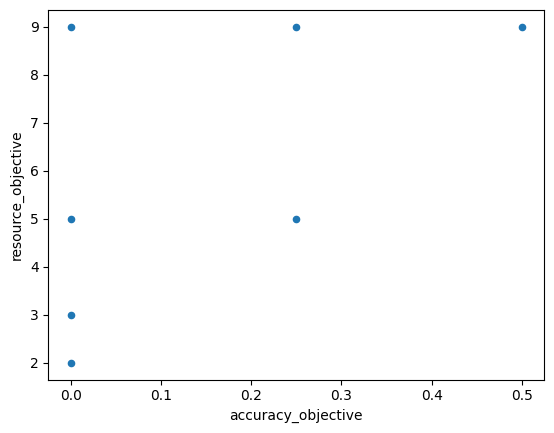

In [237]:
sla_factor_2 = 5
load = 10
new_sla = sla_partial * sla_factor_2

case_2 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
# display(case_1[selected_stats])
case_2.plot.scatter(x='accuracy_objective', y='resource_objective')

In [238]:
max_value = case_2['accuracy_objective'].max()
max_rows = case_2[case_2['accuracy_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
112001,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet18,1,1,1,0.116586,17.651515,0.0,12.421053,0.5,9,2,-8.5


In [239]:
max_value = case_2['resource_objective'].min()
max_rows = case_2[case_2['resource_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
880005,yolov5n,1,1,1,0.19799,15.076923,0.0,resnet18,1,1,1,0.116586,17.651515,0.0,15.076923,0.0,2,2,-2.0


## User Three
high latency, low throughput


load = 5
new_sla = 0.9912738779489829


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='resource_objective'>

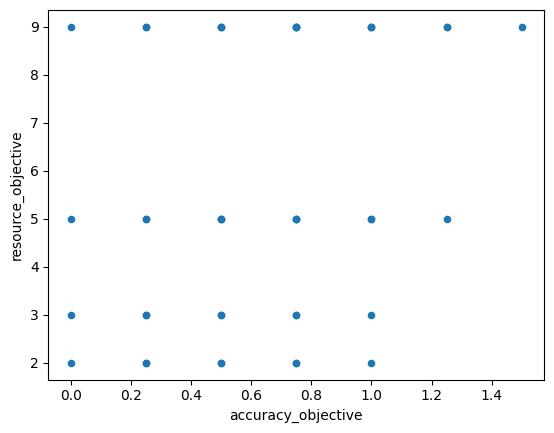

In [240]:
sla_factor_3 = 10
load = 5 
new_sla = sla_partial * sla_factor_3

case_3 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
# display(case_1[selected_stats])
case_3.plot.scatter(x='accuracy_objective', y='resource_objective')

In [241]:
max_value = case_3['accuracy_objective'].max()
max_rows = case_3[case_3['accuracy_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
728001,yolov5l,8,1,1,0.485503,6.831181,0.75,resnet101,1,1,1,0.376474,5.668565,0.75,5.668565,1.5,9,2,-7.5


In [242]:
max_value = case_3['resource_objective'].min()
max_rows = case_3[case_3['resource_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
192005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet34,1,1,1,0.140669,9.760331,0.25,6.574586,0.50,2,2,-1.50
232005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet50,1,1,1,0.298555,9.396825,0.50,6.574586,0.75,2,2,-1.25
304005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet18,1,1,1,0.116586,17.651515,0.00,6.574586,0.25,2,2,-1.75
344005,yolov5s,1,1,1,0.267022,6.574586,0.25,resnet101,1,1,1,0.376474,5.668565,0.75,5.668565,1.00,2,2,-1.00
768005,yolov5n,1,1,1,0.197990,15.076923,0.00,resnet34,1,1,1,0.140669,9.760331,0.25,9.760331,0.25,2,2,-1.75
808005,yolov5n,1,1,1,0.197990,15.076923,0.00,resnet50,1,1,1,0.298555,9.396825,0.50,9.396825,0.50,2,2,-1.50
880005,yolov5n,1,1,1,0.197990,15.076923,0.00,resnet18,1,1,1,0.116586,17.651515,0.00,15.076923,0.00,2,2,-2.00
920005,yolov5n,1,1,1,0.197990,15.076923,0.00,resnet101,1,1,1,0.376474,5.668565,0.75,5.668565,0.75,2,2,-1.25


## User Four
high latency, high throughput


load = 10
new_sla = 0.9912738779489829


/home/cc/miniconda3/envs/central/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='accuracy_objective', ylabel='resource_objective'>

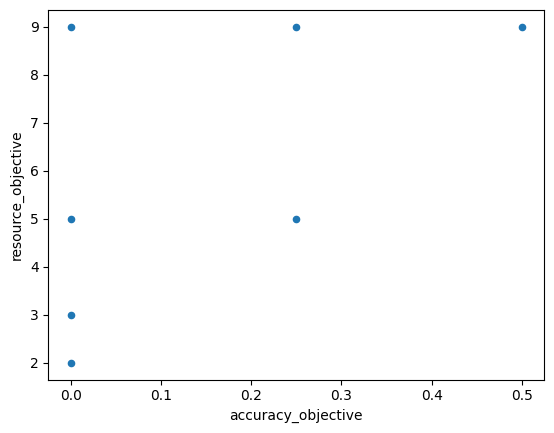

In [222]:
sla_factor_4 = 10
load = 10 
new_sla = sla_partial * sla_factor_4

case_4 = single_batch[(single_batch['pipeline_latency'] < new_sla) & (single_batch['pipeline_throughput'] > load)]

print(f"{load = }")
print(f"{new_sla = }")
# display(case_1[selected_stats])
case_4.plot.scatter(x='accuracy_objective', y='resource_objective')

In [223]:
max_value = case_4['accuracy_objective'].max()
max_rows = case_4[case_4['accuracy_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
112001,yolov5m,8,1,1,0.204542,12.421053,0.5,resnet18,1,1,1,0.116586,17.651515,0.0,12.421053,0.5,9,2,-8.5


In [224]:
max_value = case_4['resource_objective'].min()
max_rows = case_4[case_4['resource_objective'] == max_value]
max_rows[selected_stats]

,task_0_variant,task_0_cpu,task_0_batch,task_0_replicas,task_0_latency,task_0_throughput,task_0_accuracy,task_1_variant,task_1_cpu,task_1_batch,task_1_replicas,task_1_latency,task_1_throughput,task_1_accuracy,pipeline_throughput,accuracy_objective,resource_objective,batch_objective,objective
880005,yolov5n,1,1,1,0.19799,15.076923,0.0,resnet18,1,1,1,0.116586,17.651515,0.0,15.076923,0.0,2,2,-2.0
